# California Housing Data Analysis

In this notebook, I will try to analyze the performance of different machine learning models regarding a well-known dataset: the California Housing Dataset. The dataset contains more than 20,000 observations regarding California housing.

## Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

## Data preparation


In [4]:
california_housing = fetch_california_housing(as_frame=True)

### Dataset information

Once the dataset is loaded, we will take a look at the description to check out the attributes information and possible missing values.

In [9]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

The dataset contains more than 20,000 observations regarding California housing. It contains information about the median income in the block, the median house age or the average number of rooms per household among others. And, the most important thing, there isn't any missing values so we don't have to spend time cleaning the data.

Let's take a look at the data structure.

In [6]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Now, let's have a look at the value to be predicted:

In [10]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

The target value consist in the median house value for each district. We will try to estimate it based on the predictor variables like the age of the house, the number of rooms...

### Exploratory analysis

In [15]:
california_housing.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


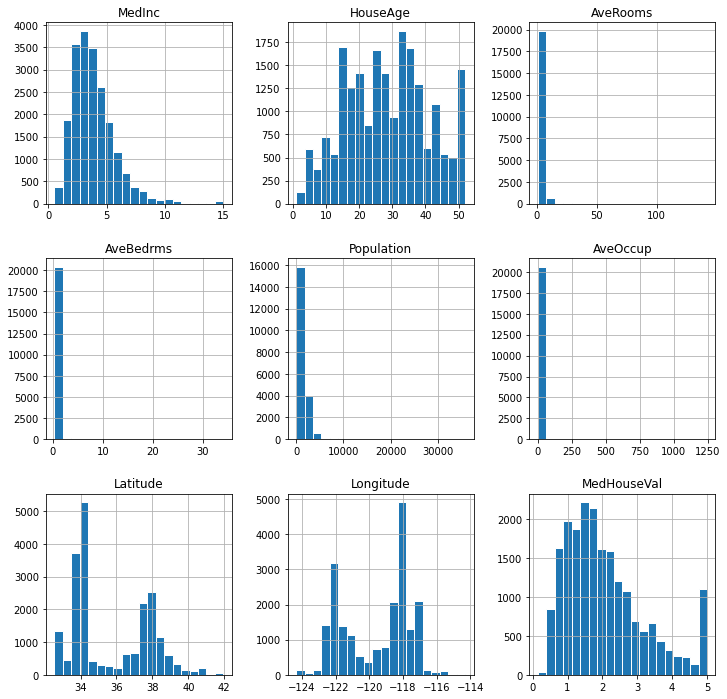

In [35]:
california_housing.frame.hist(figsize=(12,12), bins=20, edgecolor='white')
plt.subplots_adjust(hspace=0.3, wspace=0.3)


plt.show()

From the previous visualization, we can draw some interesting facts:

* The median income in somewhat normally distributed. Few people earns very little many and few people make a lot of money.
* The median house age distribution is more or less uniform.
* The median house value is skewed to the right. Also, all values above 5 are marked as 5. 

As we cannot get any insights from the average rooms, bedrooms, occupation and population, we will describe its statistics to know more.

In [39]:
california_housing.frame[['AveRooms', 'AveBedrms', 'Population', 'AveOccup']].describe()

,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,1425.476744,3.070655
std,2.474173,0.473911,1132.462122,10.386050
min,0.846154,0.333333,3.000000,0.692308
25%,4.440716,1.006079,787.000000,2.429741
50%,5.229129,1.048780,1166.000000,2.818116
75%,6.052381,1.099526,1725.000000,3.282261
max,141.909091,34.066667,35682.000000,1243.333333


Looking at the max values, we can get an idea of why the distribution is plotted like that. The difference between the 75% and the max value is huge.

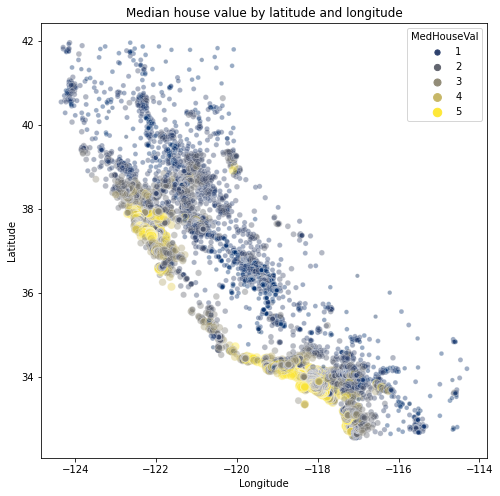

In [85]:
fig, ax = plt.subplots(figsize=[8,8])

sns.scatterplot(data=california_housing.frame, y='Latitude', x='Longitude', alpha=0.4, hue='MedHouseVal', size='MedHouseVal', palette='cividis')

ax.set_title('Median house value by latitude and longitude')

plt.show()

The scatter plot above shows the relation between the location and the house value. It is important to notice that the figure resemble the state of California. This said, there are two notorious clusters were houses have a higher prices: Los Angeles and San Francisco area.

## Regression models

Once we have explore visually the variables, it is time to look for the most accurate regression model. Remember that we are trying to estimate the price of the house based on different variables like the location and the number of bedrooms among others. 

First, let's define the predictor and target variables:

In [98]:
X = california_housing.data.values
y = california_housing.target.values

#### Differences between models

Now, we will check the differences between three linear models: Linear Regression, Lasso and Ridge. Lets

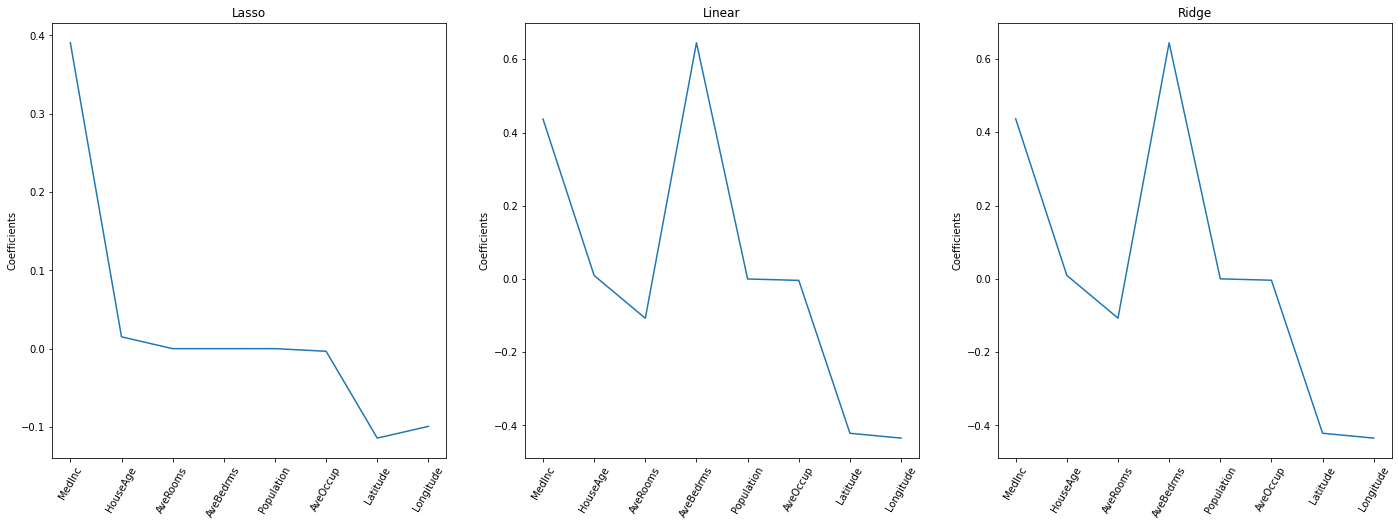

In [140]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

names = california_housing.data.columns

# Plot coefficients
fig, axs = plt.subplots(1,3, figsize=[24,8])

# Lasso
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

axs[0].plot(range(len(names)), lasso_coef)
axs[0].set_xticks(range(len(names)))
axs[0].set_xticklabels(names, rotation=60)
axs[0].set_ylabel('Coefficients')
axs[0].set_title('Lasso')

# Linear
lreg = LinearRegression()
lreg_coef = lreg.fit(X, y).coef_

axs[1].plot(range(len(names)), lreg_coef)
axs[1].set_xticks(range(len(names)))
axs[1].set_xticklabels(names, rotation=60)
axs[1].set_ylabel('Coefficients')
axs[1].set_title('Linear')

# Ridge
ridge = Ridge()
ridge_coef = ridge.fit(X, y).coef_

axs[2].plot(range(len(names)), ridge_coef)
axs[2].set_xticks(range(len(names)))
axs[2].set_xticklabels(names, rotation=60)
axs[2].set_ylabel('Coefficients')
axs[2].set_title('Ridge')

plt.show()

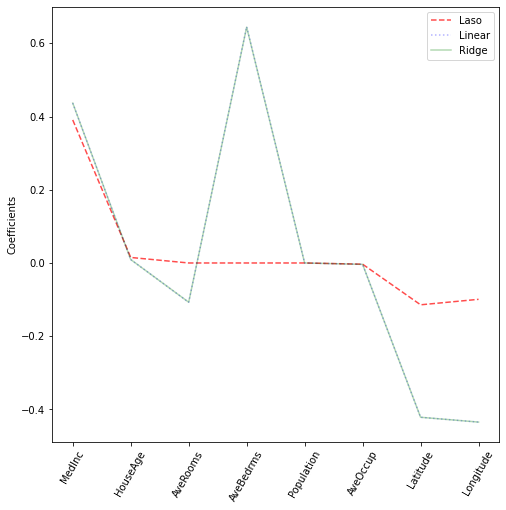

In [171]:
fig, ax = plt.subplots(figsize=[8,8])


ax.plot(range(len(names)), lasso_coef, color='red', alpha=0.7, label='Laso', linestyle='--')
ax.plot(range(len(names)), lreg_coef, color='blue', alpha=0.3, label='Linear', linestyle='dotted')
ax.plot(range(len(names)), ridge_coef, color='green', alpha=0.3, label='Ridge')


ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, rotation=60)
ax.set_ylabel('Coefficients')

plt.legend()
plt.show()

As seen on the graph above, the median income is the most important coefficient when predicting the house value. And, in my opinion it's fair to say it. The income groups a lot of different variables that are not present in the dataset and can predict the price better.

Let's use the Lasso model now to simulate our regression and check out its accuracy.

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

lasso.score(X_test, y_test)

0.5451177283676661